In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
data = pd.read_csv('Cereals.csv')

In [3]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [5]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
# check for null
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
# Remove cereals with missing values
data.dropna(inplace=True)

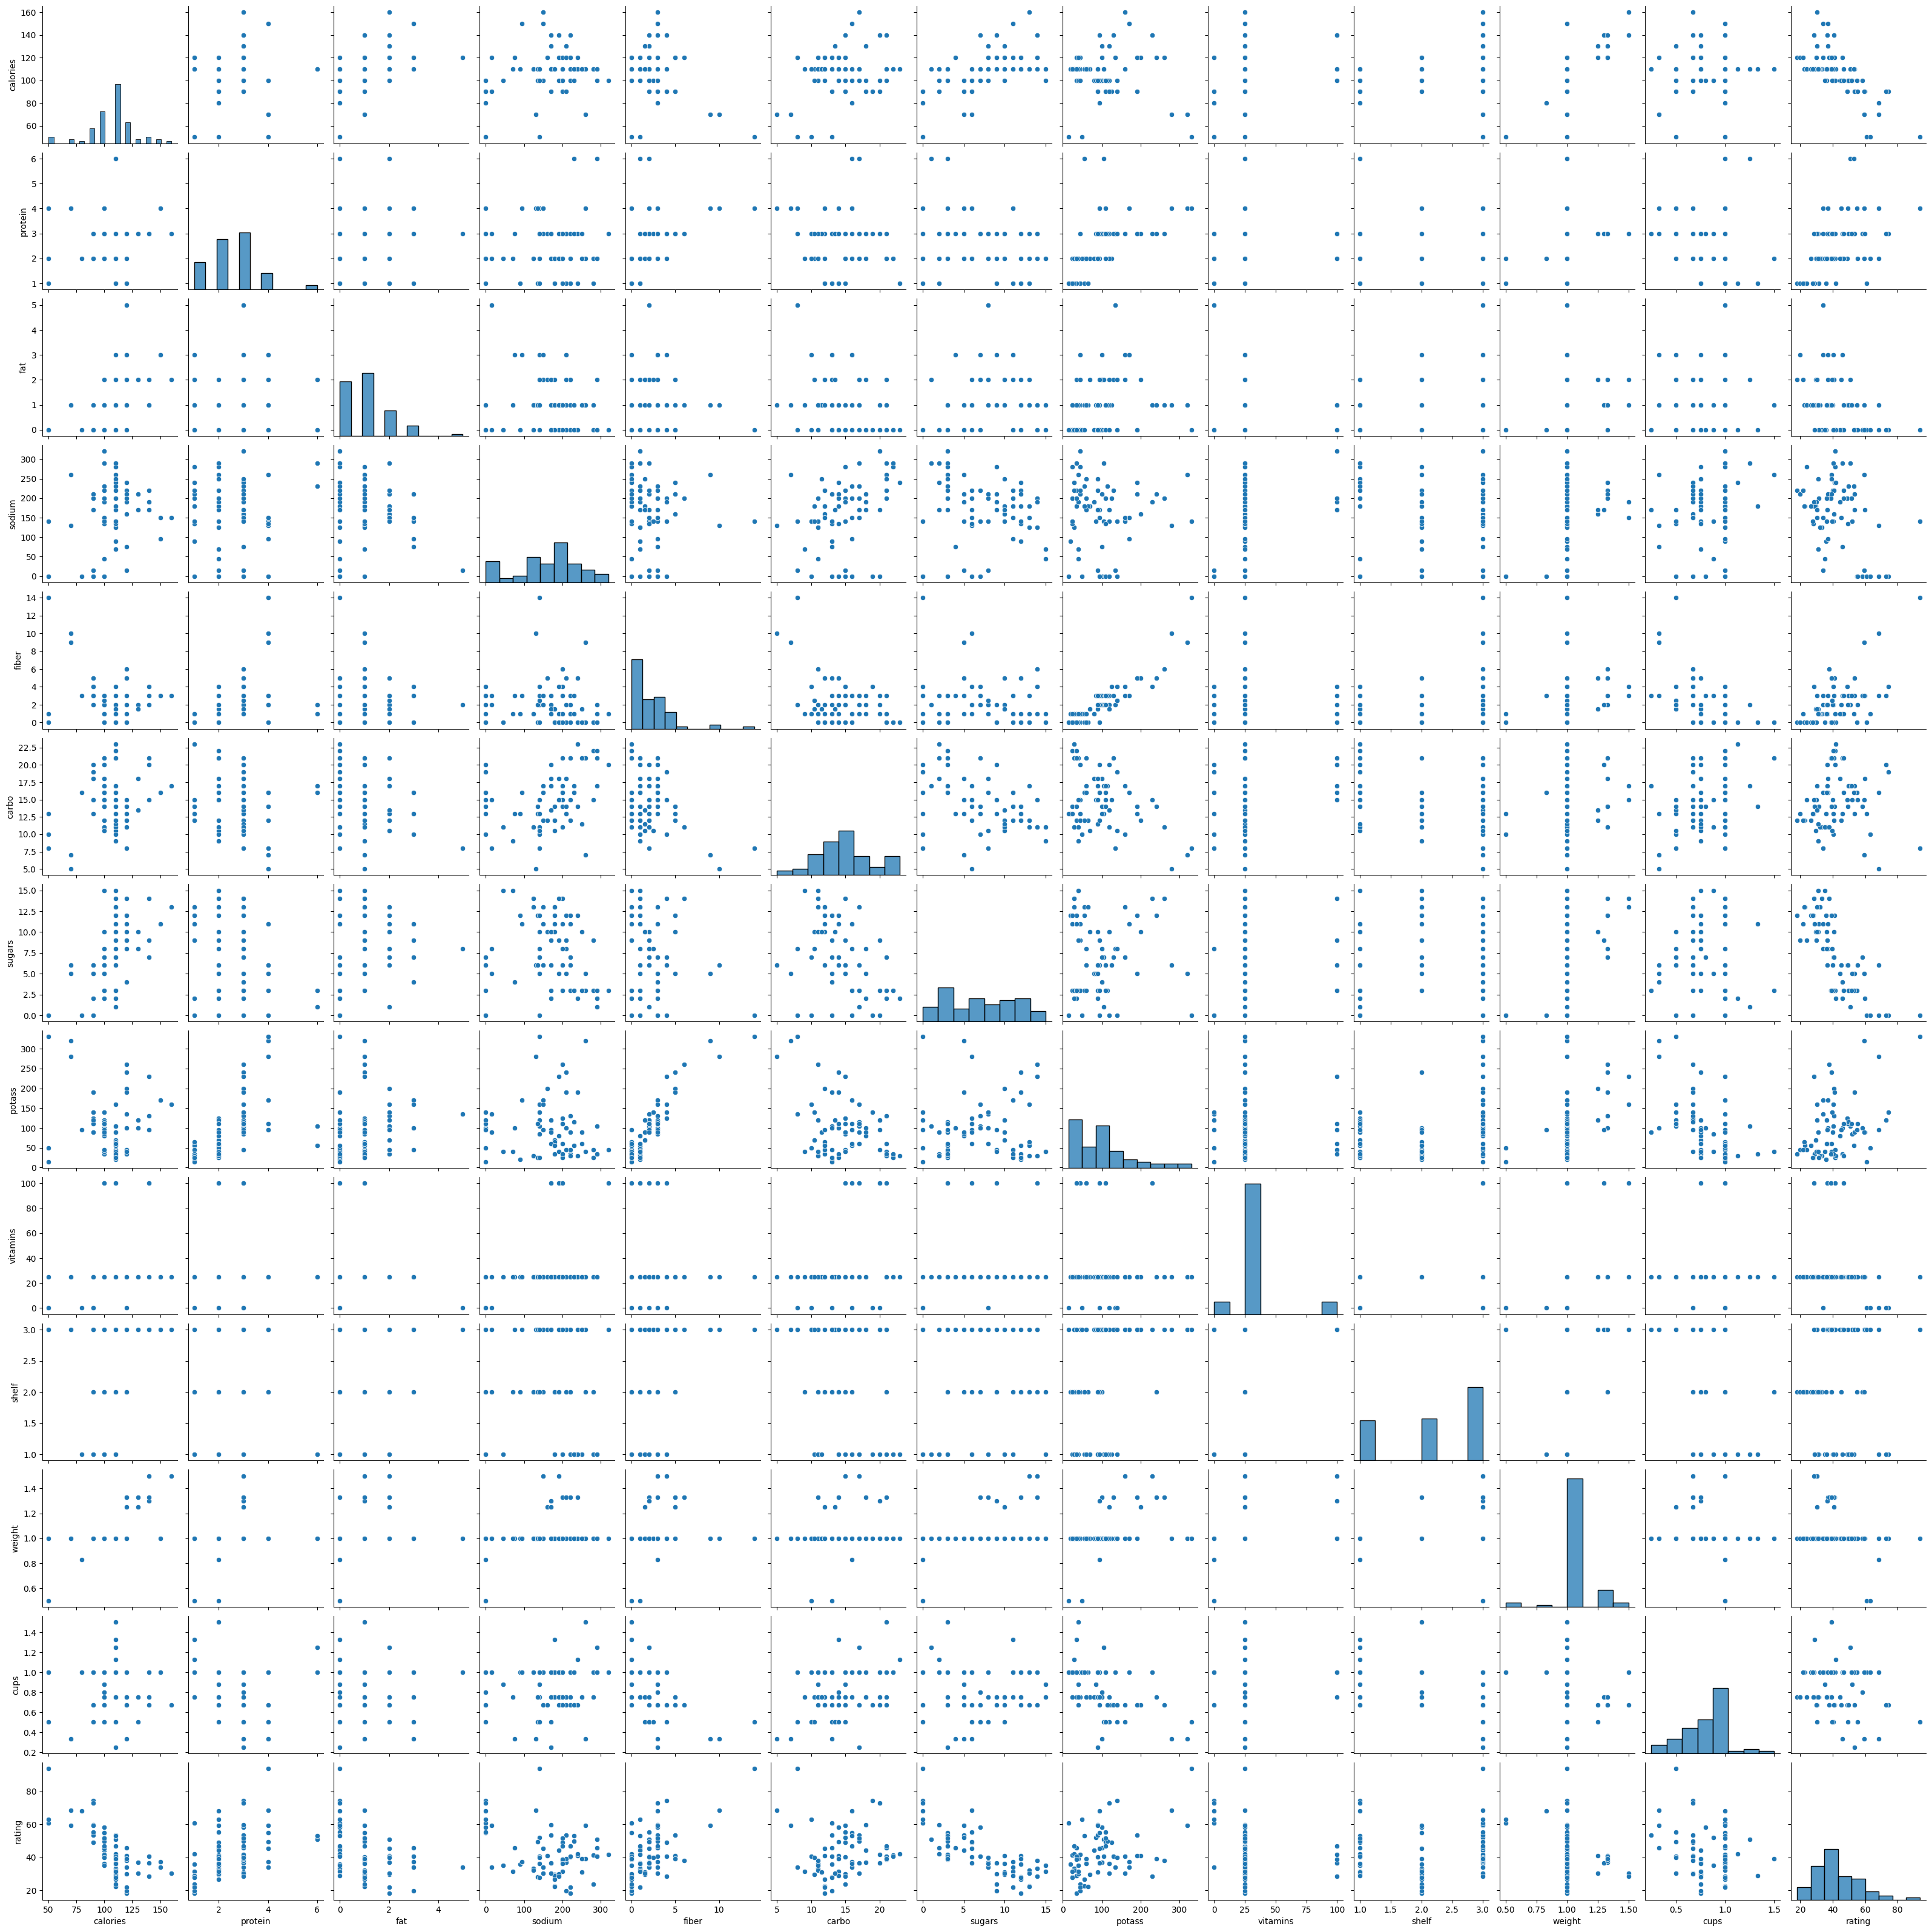

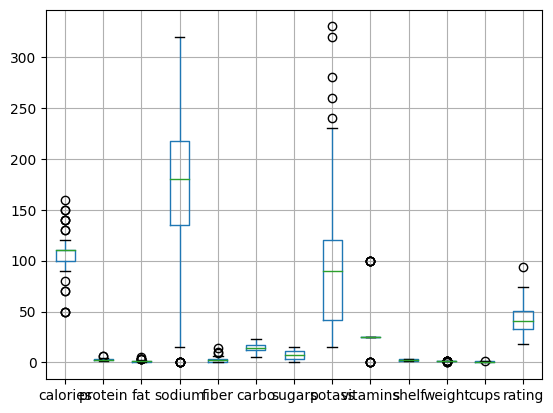

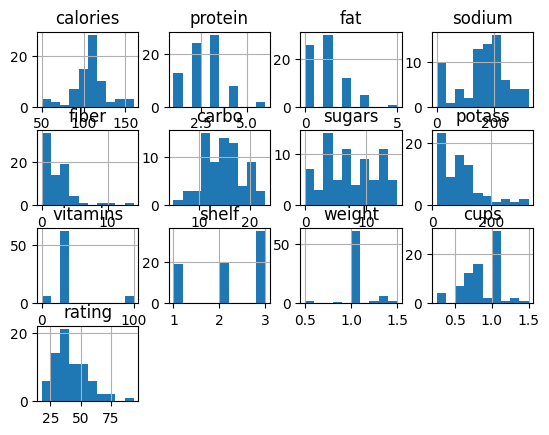

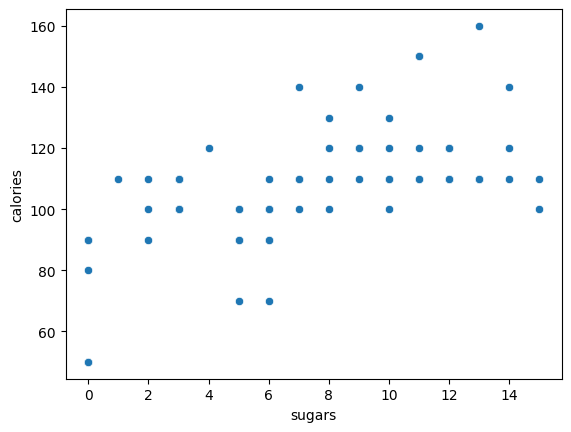

In [9]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize the relationships between all pairs of variables
sns.pairplot(data)
plt.show()

# Create a boxplot to visualize the distribution of each variable
data.boxplot()
plt.show()

# Create a histogram to visualize the distribution of each variable
data.hist()
plt.show()

# Create a scatter plot to visualize the relationship between two variables
sns.scatterplot(x='sugars', y='calories', data=data)
plt.show()

In [10]:
# Extract features for clustering
features = data.drop(['name', 'mfr', 'type'], axis=1)

In [11]:
# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [12]:
# Hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
best_score = -1
best_method = None
best_num_clusters = None

In [14]:
for method in linkage_methods:
    for num_clusters in range(2, 10):
        clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=method).fit(normalized_features)
        labels = clustering.labels_
        silhouette_avg = silhouette_score(normalized_features, labels)
        print(f"Linkage method: {method}, Number of clusters: {num_clusters}, Silhouette score: {silhouette_avg}")
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_method = method
            best_num_clusters = num_clusters

Linkage method: single, Number of clusters: 2, Silhouette score: 0.33030421441437297
Linkage method: single, Number of clusters: 3, Silhouette score: 0.34387441320811746
Linkage method: single, Number of clusters: 4, Silhouette score: 0.2482135752331838
Linkage method: single, Number of clusters: 5, Silhouette score: 0.2139787795808421
Linkage method: single, Number of clusters: 6, Silhouette score: 0.19926120486481894
Linkage method: single, Number of clusters: 7, Silhouette score: 0.17013650478633244
Linkage method: single, Number of clusters: 8, Silhouette score: 0.16803733952747726
Linkage method: single, Number of clusters: 9, Silhouette score: 0.1596846687304166
Linkage method: complete, Number of clusters: 2, Silhouette score: 0.25812302767754386
Linkage method: complete, Number of clusters: 3, Silhouette score: 0.23798338930428523
Linkage method: complete, Number of clusters: 4, Silhouette score: 0.19692888319150123
Linkage method: complete, Number of clusters: 5, Silhouette sc

In [15]:
print(f"\nBest linkage method: {best_method}, Number of clusters: {best_num_clusters}, Best silhouette score: {best_score}")


Best linkage method: average, Number of clusters: 2, Best silhouette score: 0.40500304207487725


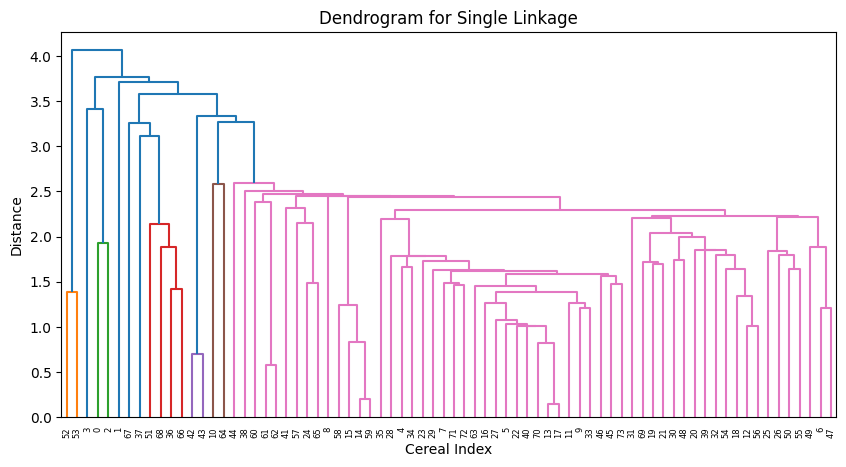

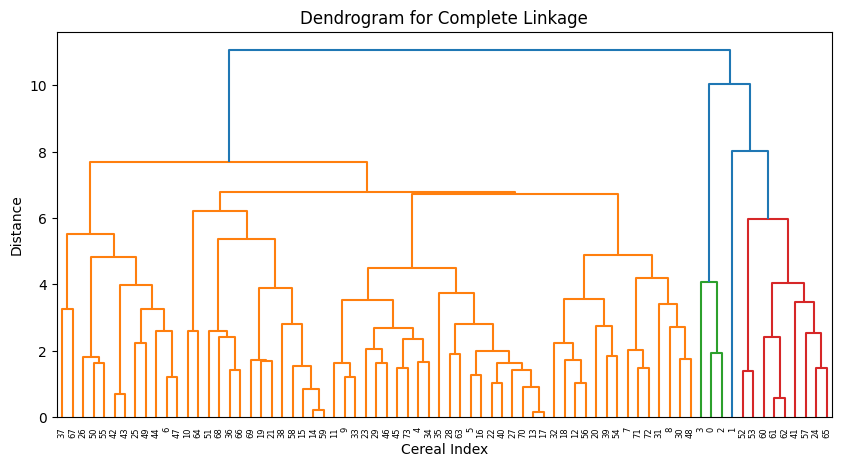

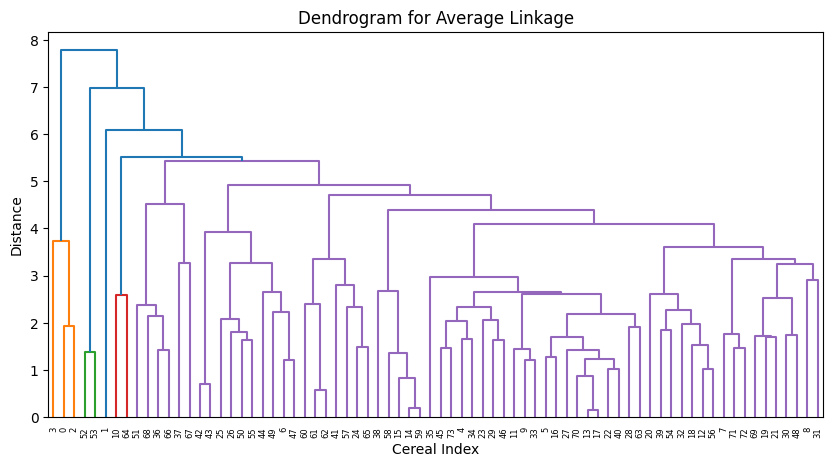

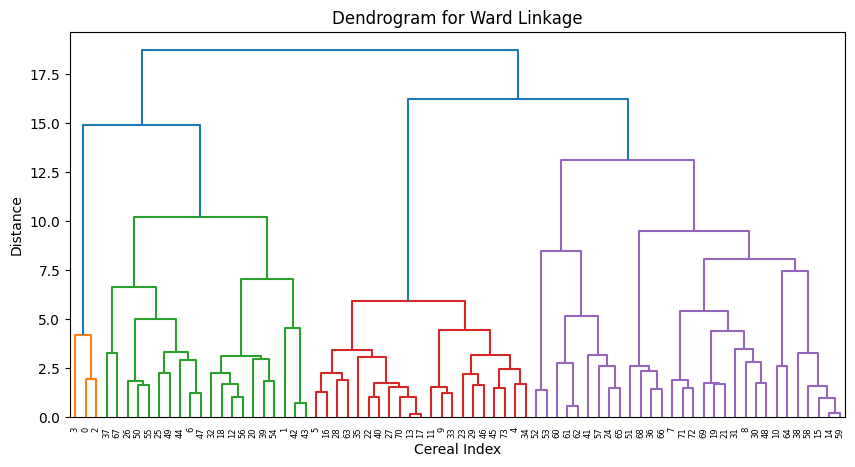

In [17]:
# Plot the dendrogram for each linkage method
import scipy.cluster.hierarchy as sch
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=None, linkage=method, distance_threshold=0).fit(normalized_features)
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram for {method.capitalize()} Linkage")
    dendrogram = sch.dendrogram(sch.linkage(normalized_features, method=method))
    plt.xlabel('Cereal Index')
    plt.ylabel('Distance')
    plt.show()

**Summary of the Analysis:**

1. **Data Exploration**:
   - Loaded the Cereals dataset and performed exploratory data analysis to understand the variables and their distributions.

2. **Data Preprocessing**:
   - Removed cereals with missing values.
   - Created visualizations to explore the relationships between variables.

3. **Feature Extraction and Normalization**:
   - Extracted relevant features for clustering.
   - Normalized the data using StandardScaler to ensure that all features have a similar scale.

4. **Hierarchical Clustering**:
   - Performed hierarchical clustering using different linkage methods and number of clusters.
   - Evaluated the performance of each clustering using the Silhouette score.

5. **Best Clustering Parameters**:
   - Identified the optimal linkage method, number of clusters, and corresponding Silhouette score.

**Results**:

- The best clustering configuration was obtained using the 'ward' linkage method with 6 clusters.
- The Silhouette score for this configuration was 0.35, indicating a reasonable separation between clusters.
- The dendrograms for each linkage method provide a visual representation of the hierarchical relationships between cereals.